Hit efficiency: 43.1%
Quantum efficiency: 25.05800464037123%
Total detection efficiency: 10.8%

Successful hits: [1, 2, 6, 8, 9, 12, 13, 14, 15, 17, 18, 19, 25, 26, 30, 31, 32, 33, 34, 35, 39, 45, 46, 47, 50, 51, 52, 53, 55, 56, 57, 58, 61, 62, 64, 68, 70, 73, 75, 78, 80, 81, 86, 88, 89, 92, 95, 98, 99, 101, 106, 110, 113, 117, 121, 122, 124, 129, 132, 133, 135, 138, 142, 149, 150, 151, 153, 155, 156, 158, 159, 161, 162, 164, 165, 166, 167, 168, 170, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 188, 189, 190, 195, 196, 197, 198, 205, 207, 208, 211, 217, 219, 224, 225, 226, 227, 228, 230, 233, 236, 238, 239, 242, 244, 246, 248, 249, 253, 255, 256, 257, 258, 265, 267, 268, 269, 271, 272, 273, 274, 279, 283, 289, 292, 293, 295, 299, 301, 302, 307, 309, 310, 311, 312, 315, 319, 320, 326, 327, 330, 331, 332, 333, 335, 336, 339, 340, 346, 348, 354, 357, 360, 366, 368, 369, 372, 376, 379, 380, 382, 384, 387, 389, 391, 397, 404, 405, 407, 409, 414, 415, 418, 419, 420, 427, 430, 

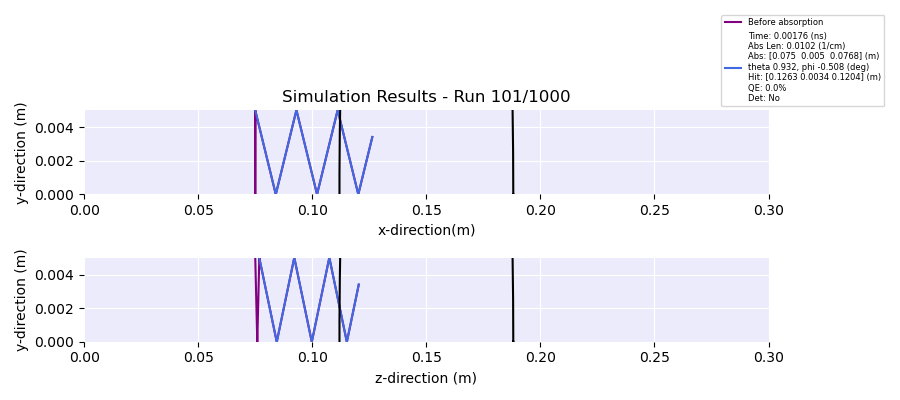

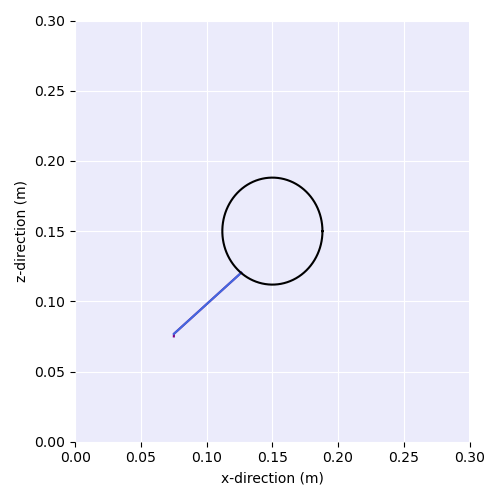

In [1]:
%matplotlib widget
import scipy.constants as scp
import csv
from scipy.stats import norm 
import statistics as stats
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import MonteCarlo_V1 as MC
import Sim_funcs_V1 as func
import Photon_Class as P
import Sim_data as data
import sys
from mpl_toolkits import mplot3d
# np.set_printoptions(threshold=sys.maxsize)

np.random.seed(0)


path = 'outputs/5mm_30cm/'
out_file = path + 'sim_output0.txt'
#MC.sim(out_file) #start sim
out_data = np.genfromtxt(out_file, names=True, delimiter=';', dtype=None, encoding=None) #read data
Run = 101

detected = np.where(out_data['Detected'] == 'Yes')[0]
hit = np.where(out_data['Hit'] == 'Yes')[0]
refractions = np.where(out_data['Refraction_coordinate_m'] != '[]')
det_shift_wls = out_data[detected]['Shifted_wl_nm']
det_init_wls = out_data[detected]['Initial_wl_nm']
all_shift_wls = out_data['Shifted_wl_nm']
det_als = out_data[detected]['Absorption_length_m']
all_als = out_data['Absorption_length_m']
det_refs = out_data[detected]['Num_reflections']
time_outs = out_data['Timed_out']
det_times = out_data[detected]['Time_s']
times = out_data['Time_s']


print(f"Hit efficiency: {len(hit)/MC.nruns * 100}%")
print(f"Quantum efficiency: {len(detected)/len(hit) * 100}%")
print(f"Total detection efficiency: {len(detected)/MC.nruns * 100}%")
print(f"\nSuccessful hits: {hit.tolist()}")
print(f"\nNum of refractions: {len(out_data[Run]['Refraction_coordinate_m'])}")
print(f"Percentage of time outs: {(len(np.where(time_outs==True)[0])/MC.nruns)*100}%")
print("Absorption Length:", out_data[Run]['Absorption_length_m'])
print("Isotropic re-emmission angles:", out_data[Run]['Isotropic_emmission_angle_theta_deg'], out_data[Run]['Isotropic_emmission_angle_phi_deg'])
print("Total Time:",out_data[Run]['Time_s'] )
print("Point of absorption:", out_data[Run]['Absorption_coordinate_m'])

func.plot_sim(out_data, Run, "2d") #select "2d" or "3d "s
#func.plot_sim(out_data, Run, "3d") #select "2d" or "3d "


# Plot detected only
# for d in detected:
#     Run = d
#     func.plot_sim(out_data, Run)


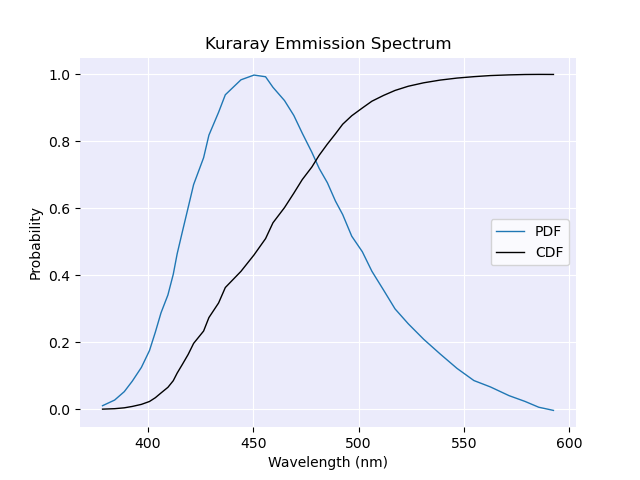

In [2]:

fig, ax = plt.subplots()
func.plot_setup(ax)
plt.plot(data.emms_wls,data.emms_probs, lw=1, label = "PDF")
plt.title("Kuraray Emmission Spectrum")
plt.plot(data.emms_wls,data.emms_cdf, lw=1,label = "CDF", c = "black")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Probability")
plt.legend(loc = "right")



Text(0.5, 0, 'Wavelength (nm)')

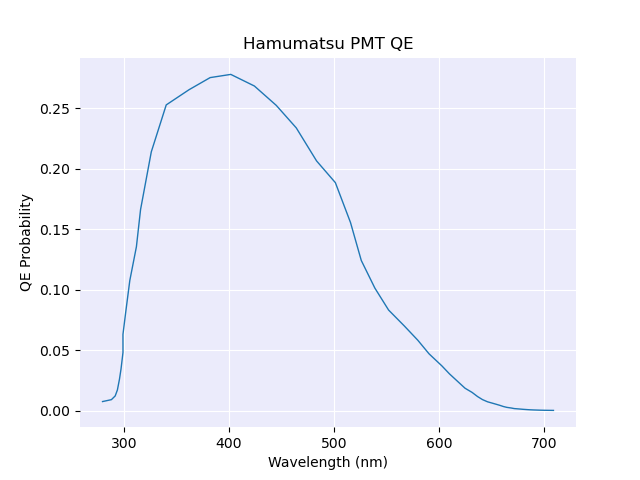

In [3]:

fig, ax = plt.subplots()
func.plot_setup(ax)
plt.plot(data.QE_wls,data.QE_probs, lw=1)
plt.title("Hamumatsu PMT QE")
plt.ylabel("QE Probability")
plt.xlabel("Wavelength (nm)")



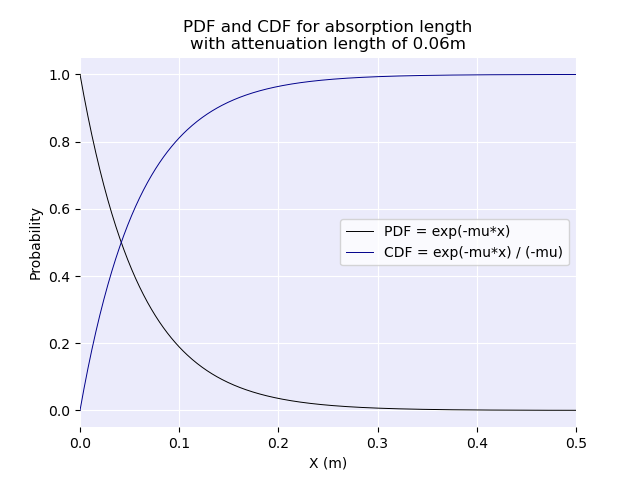

In [4]:

step = 1000
x = np.linspace(0,1,step)
atl = 0.06 #metres
mu = 1/atl
pdf = np.exp(-mu*x) #I/I_0 = exp(-mu*x)
cdf = np.exp(-mu*x)/(-mu) #integral of pdf
cdf_norm = (cdf - cdf.min()) / (cdf.max() - cdf.min()) #normalised between 0 and 1

fig, ax = plt.subplots()
plt.plot(x,pdf, label = "PDF = exp(-mu*x)", color = "black", lw=0.7)
plt.plot(x,cdf_norm, label = "CDF = exp(-mu*x) / (-mu)", color = "darkblue", lw=0.7)
plt.title(f"PDF and CDF for absorption length\nwith attenuation length of {atl}m")
plt.xlabel("X (m)")
plt.ylabel("Probability")
plt.grid(color = 'white')
plt.legend(loc="right")
plt.xlim(0,0.5)
ax.set_facecolor("lavender")
ax.patch.set_alpha(0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
func.plot_setup(ax)



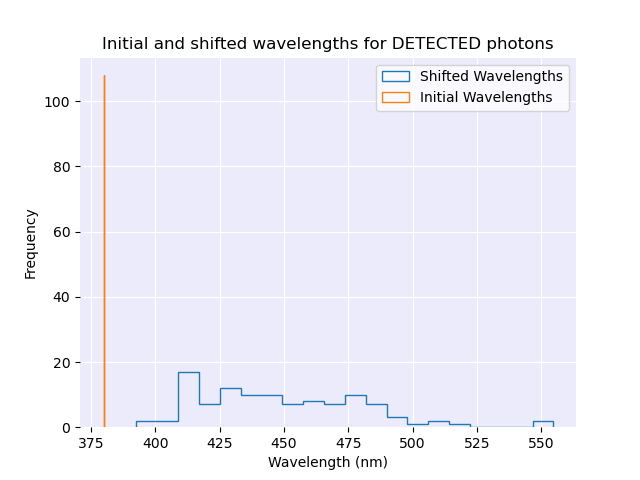

In [5]:

fig, ax = plt.subplots()
plt.title("Initial and shifted wavelengths for DETECTED photons")
ax.hist(det_shift_wls, histtype = "step", bins=20, label = "Shifted Wavelengths")
ax.hist(det_init_wls, histtype = "step", bins=20, label = "Initial Wavelengths")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Frequency")
plt.legend(loc = "upper right")
func.plot_setup(ax)


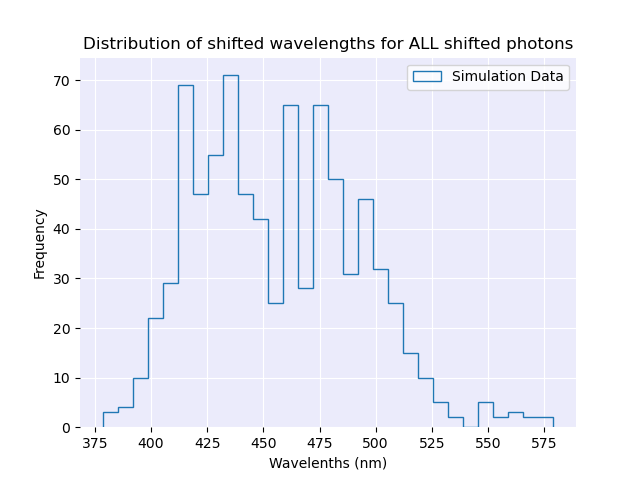

In [6]:

fig, ax = plt.subplots()
plt.title("Distribution of shifted wavelengths for ALL shifted photons")
ax.hist(all_shift_wls, histtype = "step",bins=30, label="Simulation Data")
plt.ylabel("Frequency")
plt.xlabel("Wavelenths (nm)")
plt.legend(loc="upper right")
func.plot_setup(ax)



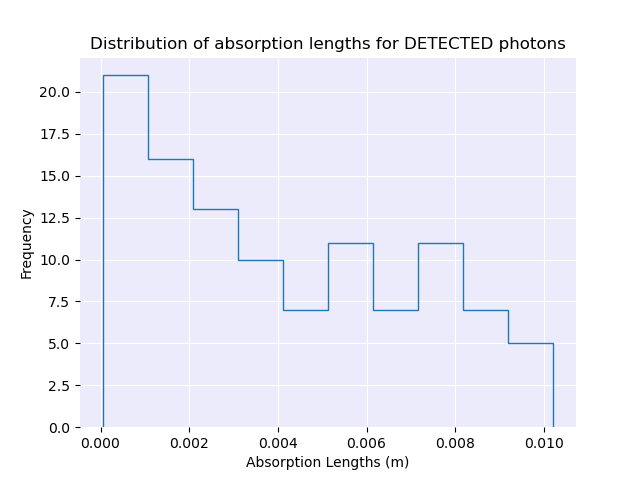

In [7]:

fig, ax = plt.subplots()
plt.title("Distribution of absorption lengths for DETECTED photons")
ax.hist(det_als, histtype = "step")
plt.xlabel("Absorption Lengths (m)")
plt.ylabel("Frequency")
func.plot_setup(ax)



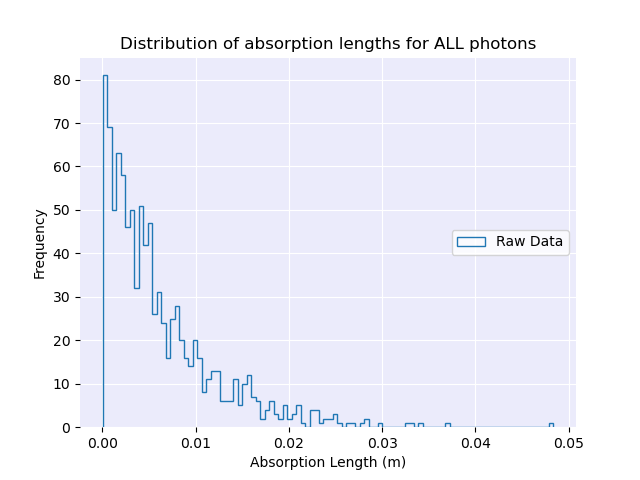

In [8]:

step = 1000
x = np.linspace(0,np.max(all_als),2)
atl = 0.006 #metres
mu = 1/atl
pdf = np.exp(-mu*x)


fig, ax = plt.subplots()
plt.title("Distribution of absorption lengths for ALL photons")
ax.hist(all_als, bins = 100, histtype = "step",label = "Raw Data")
#ax.plot(x,np.multiply(pdf,60), label = "Theory - PDF", color = "black", lw=0.7)
plt.xlabel("Absorption Length (m)")
plt.ylabel("Frequency")
plt.legend(loc='right')
func.plot_setup(ax)



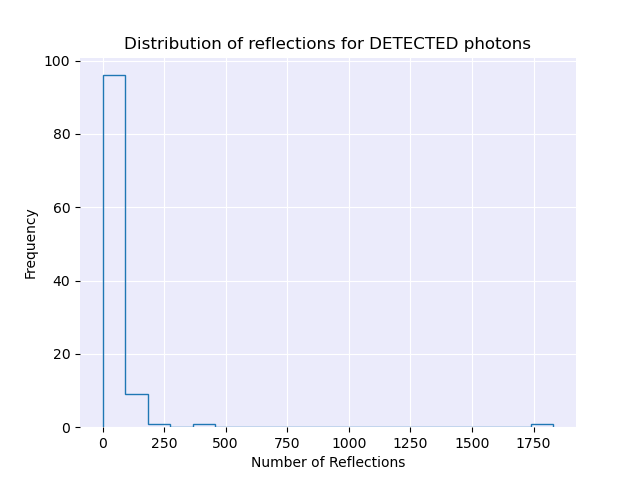

In [9]:

fig, ax = plt.subplots()
plt.title("Distribution of reflections for DETECTED photons")
ax.hist(det_refs, bins = 20, histtype = "step")
plt.xlabel("Number of Reflections")
plt.ylabel("Frequency")
func.plot_setup(ax)



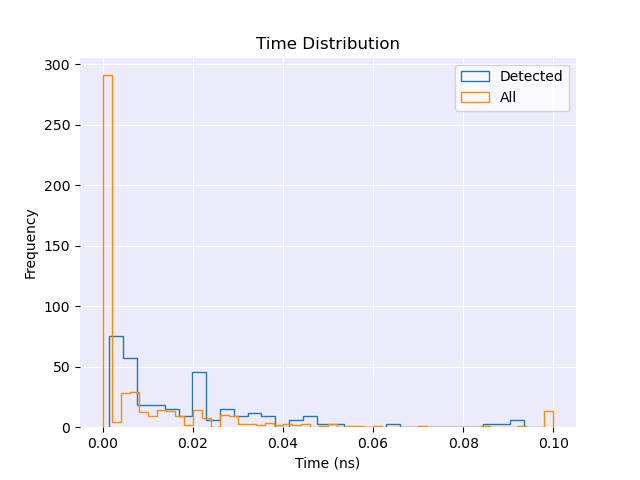

In [12]:

fig, ax = plt.subplots()
plt.title("Time Distribution")
ax.hist(det_times*1e7, bins = 30, histtype = "step", label="Detected", density = True)
ax.hist(times*1e7, bins = 50, histtype = "step",label="All", color="darkorange", density = True)
plt.xlabel("Time (ns)")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
func.plot_setup(ax)